In [61]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv('./films.csv')

#Create a backup of the original dataset to verify during coding.
df4 = pd.read_csv('./films.csv')

In [26]:
df = df.drop(df[df['Director Name'] == 'تست کاوه'].index)

In [27]:
df

,Director Name,Director Surname,Country of Birth,Country of Residence,Phone Number,Email,Biography,Portrait Photo,Title,Film Category,...,Film Photo,Trailer Link,Film Link,Connection With Kiarostami,Inspired By Kiarostami,Created At,Rejected,First Listed,Final Listed,Email Sent
0,احمد,samimi,ایران,ایران,989307160116,ahmadsamimi.artist@gmail.com,دانش آموخته ی تئاتر\r\r\nکارشناسی کارگردانی سینما,static/portrait_photos/ahmd-samimi.jpg,نشنیدن,Fiction,...,static/film_photos/nshnidn.jpg,https://drive.google.com/file/d/1xFUK_mPXrdoN0...,https://drive.google.com/file/d/1l1S6-NiUa13cB...,عناصر و نشانه های که به حیات کمک میکند برای نجات,در تصویر سازی بله,2024-03-21 07:59:02.679426+00:00,True,False,False,False
1,پدرام,مهرخواه,ایران,ایران,09379227566,Sayehfilm.iran@gmail.com,پدرام مهرخواه / فیلم‌ساز مستقل / ۲۹ ساله / متو...,static/portrait_photos/pdram-mhrkhvah.jpeg,جزر و مد,Fiction,...,static/film_photos/jzr_v_md.jpeg,https://www.instagram.com/tv/Co-cLnXoOfw/?igsh...,https://drive.google.com/file/d/1ZH64Xe36qX657...,با احترام این نظر را به عهده شما می‌گذارم که ب...,به شکل غیر مستقیم,2024-03-21 10:57:38.573231+00:00,True,False,False,False
2,مهدی,پورحسین,ایران - تبریز,ایران-تبریز- کوی لاله -مجتمع باران,989145864972,p.p.p.m.m.m.hosein.80.com@gmail.com,متولد 1382 در تبریز دانشجوی کارشناسی کارگردانی...,static/portrait_photos/mhdi-pvrhsin.jpg,در جست و جو,Fiction,...,static/film_photos/dr_jst_v_jv.jpg,NaN,https://drive.google.com/file/d/1q7UCKWIglx7nG...,کیارستمی در آثار و دیدگاهش به بچه ها جایگاهی ...,خیر,2024-03-21 11:14:30.777030+00:00,True,False,False,False
3,محمد,برزویی,ایران,ایران,09127192657,borzoueifilm1992@gmail.com,محمد فبرزویق\r\r\nمتولد ۱۳۷۲\r\r\nلیسانس تئاتر...,static/portrait_photos/mhmd-brzvii.jpeg,سها,Fiction,...,static/film_photos/sha.jpeg,https://mega.nz/file/n7Az3bgb#j9z7ezCe9GceTDMu...,https://mega.nz/file/H6Jk3b4C#NFfm_AxsSvCWZjRe...,سیننای مستقل و نگاه بین الممللی در‌اثار و جهان...,به شملی که بخوام مستقیم باشه خیر,2024-03-21 11:17:05.789151+00:00,True,False,False,False
4,پدرام,مهرخواه,ایران,ایران,09379227566,Sayehfilm.iran@gmail.com,پدرام مهرخواه/ فیلم‌ساز مستفل / ۲۹ ساله / متول...,static/portrait_photos/pdram-mhrkhvah.jpeg,بی سر و صدا,Fiction,...,static/film_photos/bi_sr_v_sda.jpeg,.,https://drive.google.com/file/d/1onzIaXckYuFoU...,الهام گرفته از روابط انسانی شخصیت‌های کودکان ف...,به شکل غیر مستقیم,2024-03-21 11:24:29.586112+00:00,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Ritam,Chakraborty,India,India,918910430651,filmspocketmoney@gmail.com,"Ritam Chakraborty, 28 year old filmmaker based...",media/portrait_photos/Director-Headshot-low_re...,Salvation Dream,Documentary,...,media/film_photos/Poster_1_FINAL-5mb.jpg,https://drive.google.com/file/d/1qYvWwZk-hiGsQ...,https://vimeo.com/906252996?share=copy,I first encountered Abbas Kiarostami's film Br...,"Before I watched Abbas Kiarostami's films, I d...",2024-06-15 17:01:24.294509+00:00,False,False,False,False
918,Aryan,Malviya,india,india,91 8890288551,aryanmalviya1000@gmail.com,"My name is Aryan Malviya, and I am 23 years ol...",media/portrait_photos/IMG_6145.jpeg,Hues of Hope,Fiction,...,media/film_photos/LOW_QUALITY_.jpg,https://youtu.be/nOT5O-EcYE4?si=cgLlPZ1sYWUhwd_d,https://youtu.be/iig7PFEGx7E,"When I first discovered cinema, I started with...","Yes, not just one of his works but most of Mr....",2024-06-15 17:12:48.247992+00:00,False,False,False,False
919,Harjeet,Singh,India,India,919914807374,harjeetwrites@gmail.com,At present working as an Assitant Professor at...,media/portrait_photos/Harjeet_Singh_VdTNcfz.jpeg,Face Books Not Facebook,Fiction,...,NaN,NaN,https://drive.google.com/file/d/1OspHFDI2d_KoZ...,Simplicity of storytelling and Child protagonist,Yes. Where is Friends Home,2024-06-15 17:37:50.411451+00:00,False,False,False,False
920,ریحانه,شریفی صحی,ایران,ایران,989373545164,Reyhanesharifi0204@gmail.com,هنرجو و فیلمساز,media/portrait_photos/024897_1hyQlYP.jpg,Questions,Documentary,...,medi

## Creating gender column


In [28]:
df['Director Name'] = df['Director Name'].str.strip().str.lower().str.title()

In [29]:
df['Director Name'].unique()

array(['احمد', 'پدرام', 'مهدی', 'محمد', 'حمید رضا', 'آرش', 'خشایار',
       'مهرداد', 'امیر', 'میثم', 'محسن', 'کیان', 'Sepide', 'Mobin',
       'حسام و عباس', 'مهران', 'علی', 'آرزو', 'اسماعیل', 'Mostafa',
       'Arash', 'دانیال', 'حمید', 'سامان', 'مرتضی', 'سروش', 'صباح',
       'الهام', 'ناصر', 'نگار', 'Amir', 'مریم', 'هاشم', 'Abdul Hamid',
       'ایمان', 'Hesam', 'مصطفی', 'سینا - امیر', 'حسین', 'رضا', 'الهه',
       'مهسا', 'محمد مهدی', 'Meysam', 'هامون', 'سید مرتضی', 'مسعود',
       'شاهین', 'کیانوش', 'بهراد', 'Saman', 'Caner', 'زهرا', 'Bardia',
       'Hamed', 'Elika', 'الیکا', 'Kadir', 'سید محمد علی', 'وحید', 'حبیب',
       'آزاد', 'محمود', 'مژده', 'عقیل', 'Iman', 'رعنا - عذرا', 'Saeed',
       'بهمن', 'محمدرضا', 'عادل', 'Mojtaba', 'Mohamad', 'Rachel', 'سجاد',
       'خلیل', 'مختار', 'Madyar', 'شفق', 'Ali', 'شیوا', 'هاوار', 'فرزین',
       'آکو', 'Roya', 'Nali', 'سعید', 'Hassan', 'آریوبرزن', 'Aili',
       'Kaveh', 'بهروز', 'Mohamadsina', 'مجید', 'یاسر', 'صابر',
       'Muhammadr

In [30]:
#Male's names
male_names_list = [
   'احمد', 'پدرام', 'مهدی', 'محمد', 'حمید رضا', 'آرش', 'خشایار',
       'مهرداد', 'امیر', 'میثم', 'محسن', 'کیان', 'mobin', 'حسام و عباس',
       'مهران', 'علی', 'اسماعیل', 'Mostafa', 'Arash', 'دانیال', 'حمید',
       'سامان', 'مرتضی', 'سروش', 'صباح', 'ناصر', 'Amir', 'هاشم',
       'Abdul hamid', 'ایمان', 'Hesam', 'مصطفی', 'سینا - امیر', 'حسین',
       'رضا', 'محمد مهدی', 'meysam', 'هامون', 'سید مرتضی', 'مسعود',
       'شاهین', 'کیانوش', 'بهراد', 'Saman', 'Caner', 'Bardia', 'Hamed',
       'Kadir', 'سید محمد علی', 'وحید', 'حبیب', 'آزاد', 'محمود', 'عقیل',
       'Iman', 'Saeed', 'بهمن', 'محمدرضا', 'عادل', 'Mojtaba', 'Mohamad',
       'سجاد', 'خلیل', 'مختار', 'مادیار', 'شفق', 'Ali', 'هاوار', 'فرزین',
       'آکو', 'Nali', 'سعید', 'Hassan', 'آریوبرزن', 'AILI', 'Kaveh',
       'بهروز', 'Mohamadsina', 'مجید', 'یاسر', 'صابر', 'Muhammadreza',
       'امیرمحمد', 'شادمهر', 'Orod', 'پیمان', 'فرید', 'محمد امین', 'سینا',
       'نادر', 'Yassine', 'Ahmad and Mohamad', 'Mohamad and Ahmad',
       'Mohsen', 'فواد', 'سیاوش', 'Sahand', 'علیرضا', 'Moj',
       'Hamidreza and Hamed', 'Rowal', 'Hadi', 'امیراردلان', 'Siavash',
       'محمدمهدی', 'Reza', 'کوروش', 'Kiarash', 'SAHAND', 'احسان', 'معین',
       'Shahoo', 'ارسطو', 'Bahman , Ramin', 'Nima', 'Masoud', 'Pedram',
       'رسام', 'عباس', 'Farshid', 'حمیدرضا', 'بهنام', 'سید عدنان',
       'محمد رضا', 'مجتبی', 'شهاب', 'آژاک', 'آرمین', 'Mobin', 'یوسف',
       'Madyar', 'فربد', 'محمد نام مستعار پویا', 'Kapil', 'نیما', 'Omid',
       'ali', 'Mehdi, Saied', 'Armin', 'عزت الله', 'هادی', 'Navid',
       'Sarkot', 'Sabah', 'Shahryar', 'Sohaib', 'فرشاد', 'Parsa', 'Ahmad',
       'محسن  - جواد', 'مبین', 'Kamran', 'محمد(شهرام)', 'مصطفا', 'رامین',
       'Husnora', 'فرگل - سیدحسین', 'مازیار', 'بیژن', 'عرفان', 'رسول',
       'Zabiullah', 'nazir', 'کورش', 'مهریار', 'فرشید', 'صالح', 'اطهر',
       'سیدجواد', 'شهرام', 'نوید', 'محمدعلی', 'کیا', 'komeil', 'Rahbar',
       'Mohamadreza', 'Roghayeh', 'آرمان', 'اکبر', 'ارمین', 'میلاد',
       'امیررضا', 'حامد', 'بهادر', 'سهیل - فریما', 'صادق', 'متین',
       'Arman', 'صحرا', 'کیارش', 'بهروز ، شیرین ، فرناز', 'mehdi',
       'مهدی (پوریا)', 'اهورا', 'عرشیا', 'کورُش', 'منصور', 'اردشیر',
       'پوریا', 'آرسان', 'کیانمهر', 'Swayam', 'Alireza', 'Monir', 'جابر',
       'Shahin', 'Başak', 'سبحان ، محمد', 'Tahmineh', 'جواد', 'ASoq',
       'Mohammad Mahdi', 'Kiarash, Arash', 'Sajad, Alireza', 'Peyvand',
       'عمران', 'Saleh', 'Amirhossein', 'Yasaman', 'Mumin', 'افشین',
       'مسلم', 'شهریار', 'دلاور', 'بابک', 'Maggie', 'امیرمحسن', 'Odina',
       'khaled', 'Amen', 'پرستو / سیاوش', 'محمدحسن', 'ماجد', 'بهزاد',
       'Morteza', 'بنی', 'Hasainar', 'کیوان', 'Ehsan', 'فرهاد',
       'سید جواد', 'Mohammad', 'omid', 'اصغر', 'فرزاد', 'امیرحسین',
       'مهدي', 'حسن', 'بهرام', 'محمد علی', 'mathlouthi', 'سید محمدحسین',
       'محمدنبی', 'محمدجواد', 'سید محمدرضا', 'navid', 'marwa',
       'Shiblul Haque Shuvon', 'عیسی', 'علی محمد', 'علی اکبر', 'محمدحسین',
       'محمد پوریا', 'روزبه', 'محمد جواد', 'Davoud', 'سورنا', 'امین',
       'سهیل', 'جمشید', 'پارسا', 'بهار', 'نیما و آلما', 'صمد',
       'مهدی / مهدی', 'Erraihani', 'سید مهدی', 'Sasan', 'اشکان', 'بلال',
       'کاووس', 'محمدهادی', 'فردین', 'رهام', 'Sajad/Mehdi', 'باربد',
       'سید علی', 'سعید کشاورز', 'غلامحسین', 'Parvez', 'کسرا', 'حسام',
       'Mashaallah', 'عدنان', 'آلما و نیما', 'پیام', 'محمد عرفان',
       'امیرعلی', 'مسیح', 'طاها', 'عارف', 'فریبا ، مهدی (دو کارگردان)',
       'امید', 'ارمان', 'آرمین _رادین', 'آریا', 'شروین', 'مانی', 'پویا',
       'مهیار', 'امیر حسین', 'آروین', 'یاسین', 'صدرا', 'عطا', 'Mehrshad',
       'Karan', 'مهراد', 'امیرسجاد', 'علی طوسی', 'سپهر', 'سید علیرضا',
       'رهی', 'سید بهیاد - طاهره', 'سیدحامد', 'Soban', 'Harjeet', 'Radin',
       'سحر', 'محمدباقر', 'مهنوش', 'Fariborz', 'Ritam', 'Aryan'
       'امیرسجاد', 'سپهر', 'محمدباقر'
    
]

#Update gender column
df.loc[df['Director Name'].isin(male_names_list), 'Gender'] = 'male'


/var/folders/1n/7pvyp0kj0w310_hltg5yby980000gn/T/ipykernel_18642/1294924417.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'male' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Director Name'].isin(male_names_list), 'Gender'] = 'male'


In [31]:
#Female's names
female_names_list = [
    'Sepide', 'آرزو', 'الهام', 'نگار', 'مریم', 'الهه', 'مهسا', 'زهرا',
       'Elika', 'الیکا', 'مژده', 'رعنا - عذرا', 'Rachel', 'شیوا', 'Roya',
       'Zahra', 'ژیلا', 'ستاره', 'زینب', 'Arezoo', 'پریناز', 'منیژه',
       'دنیا', 'Selin', 'روناک', 'سوگل', 'منا', 'مینا', 'کیمیا', 'ریحانه',
       'پانیذ', 'شهرزاد', 'سهیلا', 'سیده منصوره', 'سارا', 'اکرم', 'نگین',
       'هستی', 'فاطیما', 'Hasti', 'مهتاب', 'یاسمن', 'شکیبا', 'ملیکا',
       'سحرسادات', 'درسا', 'آیدا', 'Sara', 'روژان', 'روجا', 'مهدیس',
       'ترانه', 'Hoda', 'Nasim', 'Leila', 'Sama', 'Samira', 'نرجس',
       'گیتا', 'شادی', 'Niusha', 'مرجان', 'مهدیه', 'عارفه', 'زیور',
       'فاطمه', 'پوپک', 'Shugyla', 'بهجت', 'آسمان', 'Negin', 'Poroshat',
       'غزال', 'کتایون', 'Elakal', 'Samaneh', 'یکتا', 'لیدا', 'Azadeh',
       'عسل', 'فائزه', 'Negar', 'ساحل', 'شقایق', 'Anastasija', 'ایدا',
       'نسیم', 'ناهید', 'مائده', 'پگاه', 'نازنین', 'ساجده', 'فهیمه',
       'صبا', 'Safoura', 'خدیجه', 'سیده النا', 'نفیسه', 'Goli (Maryam)']

#Update gender column
df.loc[df['Director Name'].isin(female_names_list), 'Gender'] = 'female'

In [32]:
df.loc[~df['Director Name'].isin(male_names_list) & ~df['Director Name'].isin(female_names_list), 'Gender'] = 'Other'

In [33]:
df['Gender'].value_counts()

Gender
male      755
female    148
Other      18
Name: count, dtype: int64

## Edit Countries

In [34]:
df['Country of Residence'].unique()

array(['ایران', 'ایران-تبریز- کوی لاله -مجتمع باران', 'Iran', 'tehran',
       'تهران', 'Canada', 'France', 'فارس', 'کرج', 'Tehran', 'iarn',
       'Korea', 'Türkiye', 'IRAN', 'Turkey', 'امارات', 'United States',
       'ایران(تهران)', 'Austria', 'Iraq', 'iran', 'England', 'Maroc',
       'ایران / کانادا', 'كانادا', 'Kurdistan. Iraq', 'آلمان', 'اسران',
       'ايران', 'یزد', 'India', 'O’zbekiston', 'Tajikistan',
       'South Korea', 'France - Reims', 'The Netherlands', 'Australia',
       'Germany', 'کرمان', 'NEPAL', 'Freiburg', 'Dushanbe', 'USA',
       'Kurdistan', 'پرتغال / ایران', 'Kazakhstan', 'tunis', 'سوئد',
       'كردستان', 'Egypt', 'Bangladesh', 'ایرانی', 'هلند',
       'ایران / امریکا', 'اصفهان', 'Morocco', 'Switzerland', 'Cyprus',
       'Países Bajos', 'تهران _کانادا', 'Sri Lanka', 'Sweden', 'india'],
      dtype=object)

In [35]:
#Edit name of countries
location_mapping = {
    'ایران': 'Iran',
    'ایران-تبریز- کوی لاله -مجتمع باران': 'Iran',
    'Iran': 'Iran',
    'tehran': 'Iran',
    'تهران': 'Iran',
    'Canada': 'Canada',
    'France': 'France',
    'فارس': 'Iran',
    'کرج': 'Iran',
    'Tehran': 'Iran',
    'iarn': 'Iran',  
    'Korea': 'South Korea',
    'Türkiye': 'Turkey',
    'IRAN': 'Iran',
    'Turkey': 'Turkey',
    'امارات': 'UAE',
    'United States': 'USA',
    'ایران(تهران)': 'Iran',
    'Austria': 'Austria',
    'Iraq': 'Iraq',
    'iran': 'Iran',
    'England': 'United Kingdom',
    'Maroc': 'Morocco',
    'ایران / کانادا': 'Iran',
    'كانادا': 'Canada',
    'Kurdistan. Iraq': 'Iraq',
    'آلمان': 'Germany',
    'اسران': 'Iran',   
    'ايران': 'Iran',
    'یزد': 'Iran',
    'India': 'India',
    'O’zbekiston': 'Uzbekistan',
    'Tajikistan': 'Tajikistan',
    'South Korea': 'South Korea',
    'France - Reims': 'France',
    'The Netherlands': 'Netherlands',
    'Australia': 'Australia',
    'Germany': 'Germany',
    'کرمان': 'Iran',
    'NEPAL': 'Nepal',
    'Freiburg': 'Germany',
    'Dushanbe': 'Tajikistan',
    'USA': 'USA',
    'Kurdistan': 'Iraq',
    'پرتغال / ایران': 'Iran',
    'Kazakhstan': 'Kazakhstan',
    'tunis': 'Tunisia',
    'سوئد': 'Sweden',
    'كردستان': 'Iraq',
    'Egypt': 'Egypt',
    'Bangladesh': 'Bangladesh',
    'ایرانی': 'Iran',
    'هلند': 'Netherlands',
    'ایران / امریکا': 'USA',
    'اصفهان': 'Iran',
    'Morocco': 'Morocco',
    'Switzerland': 'Switzerland',
    'Cyprus': 'Cyprus',
    'Países Bajos': 'Netherlands',
    'تهران _کانادا': 'Canada',
    'Sri Lanka': 'Sri Lanka',
    'Sweden': 'Sweden',
    'india': 'India'
}


In [36]:
df['Country of Residence'] = df['Country of Residence'].astype('object')

In [37]:
df['Country of Residence'] = df['Country of Residence'].map(location_mapping).fillna(df['Country of Residence'])

In [38]:
df['Country of Residence'].unique()

array(['Iran', 'Canada', 'France', 'South Korea', 'Turkey', 'UAE', 'USA',
       'Austria', 'Iraq', 'United Kingdom', 'Morocco', 'Germany', 'India',
       'Uzbekistan', 'Tajikistan', 'Netherlands', 'Australia', 'Nepal',
       'Kazakhstan', 'Tunisia', 'Sweden', 'Egypt', 'Bangladesh',
       'Switzerland', 'Cyprus', 'Sri Lanka'], dtype=object)

### Edit Durations

In [39]:
df['Duration_cleaned'] = df['Duration'].str.replace(r"[^0-9,.':;]", "",regex=True)

In [40]:
def convert_persian_to_english(text):
    persian_to_english_map = {
        '۰': '0', '۱': '1', '۲': '2', '۳': '3', '۴': '4',
        '۵': '5', '۶': '6', '۷': '7', '۸': '8', '۹': '9',
        '٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4',
        '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'
    }
    for persian_digit, english_digit in persian_to_english_map.items():
        text = text.replace(persian_digit, english_digit)
    return text

# Apply the function to a specific column
df['duration_english'] = df['Duration'].apply(convert_persian_to_english)
    

In [41]:


def convert_to_mm_ss(text):
    # Convert Persian/Arabic-Indic digits to English
    persian_to_english_map = {
        '۰': '0', '۱': '1', '۲': '2', '۳': '3', '۴': '4',
        '۵': '5', '۶': '6', '۷': '7', '۸': '8', '۹': '9',
        '٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4',
        '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'
    }
    for persian_digit, english_digit in persian_to_english_map.items():
        text = text.replace(persian_digit, english_digit)

        # Standardize text
        text = text.lower().replace('دقیقه', 'min').replace('ساعت', 'hour').replace('hours', 'hour').replace('ثانیه', 'sec').replace('seconds', 'sec')

        minutes = 0
        seconds = 0

        # Handle "X hour" or "X hours"
        if 'hour' in text:
            match = re.search(r'(\d+)\s*hour', text)
            if match:
                minutes += int(match.group(1)) * 60

        # Handle "X min"
        if 'min' in text:
            match = re.search(r'(\d+)\s*min', text)
            if match:
                minutes += int(match.group(1))

        # Handle "X sec"
        if 'sec' in text:
            match = re.search(r'(\d+)\s*sec', text)
            if match:
                seconds += int(match.group(1))

        # Handle "X:Y" (HH:MM or MM:SS)
        if ':' in text:
            parts = text.split(':')
            if len(parts) == 2:  # Format MM:SS
                minutes_part = re.sub(r'\D', '', parts[0])  # Remove non-numeric characters
                seconds_part = re.sub(r'\D', '', parts[1])  # Remove non-numeric characters

                # Ensure both parts are not empty and are valid numbers
                if minutes_part.isdigit():
                    minutes += int(minutes_part)
                if seconds_part.isdigit():
                    seconds += int(seconds_part)

        # Handle decimal numbers (e.g., 3.5 hours or 1.5 min)
        match = re.search(r'(\d+\.\d+)', text)
        if match:
            decimal_minutes = float(match.group(1)) * 60
            minutes += int(decimal_minutes // 60)
            seconds += int(decimal_minutes % 60)

        # Handle single numbers (assume minutes)
        if re.match(r'^\d+$', text.strip()):
            minutes += int(text.strip())

        # Ensure seconds are less than 60
        minutes += seconds // 60
        seconds = seconds % 60

        return f"{minutes:02}:{seconds:02}"

# Apply the function to the column
df['duration_mm_ss'] = df['Duration'].apply(convert_to_mm_ss)

In [42]:
df['duration_mm_ss'].unique()

array(['20:00', '15:00', '19:00', '00:00', '07:00', '18:00', '11:00',
       '05:00', '08:00', '14:00', '12:24', '09:00', '16:00', '10:00',
       '24:00', '12:00', '14:53', '04:00', '17:00', '30:00', '03:30',
       '27:00', '11:51', '16:43', '16:10', '06:00', '16:09', '03:00',
       '10:36', '23:00', '19:55', '22:30', '01:00', '10:57', '13:00',
       '01:40', '22:00', '25:00', '17:38', '06:12', '15:39', '11:54',
       '02:06', '04:10', '07:08', '15:11', '01:20', '01:33', '14:58',
       '04:32', '07:26', '12:44', '08:13', '13:39', '36:00', '97:00',
       '02:54', '01:55', '38:00', '13:18', '10:17', '14:51', '06:17',
       '09:36', '17:54', '28:00', '05:48', '37:45', '2938:26', '01:19',
       '10:25', '14:33', '21:00', '05:24', '14:30', '06:40', '14:44',
       '07:30', '03:03', '15:02', '10:20', '11:53', '12:43', '15:51',
       '05:33', '11:02', '04:27', '07:27', '03:05', '07:38', '07:46',
       '11:50', '01:54', '13:45', '08:30', '03:23', '09:50', '02:38',
       '07:18', '0

#### I faced a challenge here. The values imported by applicants weren’t clear at all, so I made some manual tweaks :)).

In [43]:
df[['Duration','duration_mm_ss']].iloc[900:]

,Duration,duration_mm_ss
901,24,24:00
902,29:48,29:48
903,6:58 min,64:58
904,9.57 minutes,66:34
905,5.25 Minutes,30:15
906,9:27,09:27
907,8,08:00
908,4 دقیقه,04:00
909,10 دقیقه,10:00
910,8,08:00


In [44]:
df.loc[918, 'duration_mm_ss'] = 'ٖ05:02'

### Edit Inspiration Status 

In [45]:
df['Inspired_By_Kiarostami_clean'] =df['Inspired By Kiarostami']

In [46]:
df['Inspired_By_Kiarostami_clean'] = df['Inspired By Kiarostami'].str.strip().str.lower().replace(r'\r\n', '', regex=True)


In [47]:
def inspired(value):
    if isinstance(value, str):  
        value = value.lower()
        if 'yes' in value or 'Yes' in value or 'بله' in value or 'آره' in value or 'اره' in value:
            return 'Yes'
        elif 'no' in value or 'No' in value or 'نه' in value or 'خیر' in value:
            return 'No'
        else:
            return 'Other ways'
    else:
        return 'Other ways' 

In [48]:
df['Inspired_By_Kiarostami_clean'] = df['Inspired By Kiarostami'].apply(inspired)

### Edit production year 

In [49]:
#Convert Solar year to Western calender year
df['Production Year'] = df['Production Year'].apply(lambda i: i + 622 if i < 2000 else i)


In [58]:
Q1 = df['Production Year'].quantile(0.25)  # First quartile (25%)
Q3 = df['Production Year'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Production Year'] < lower_bound) | (df['Production Year'] > upper_bound)]

In [60]:
outliers['Production Year']

21     2013
44      646
91     2010
107    2618
118    2014
       ... 
887    1664
895    2014
913    2008
914    2008
921    2013
Name: Production Year, Length: 63, dtype: int64

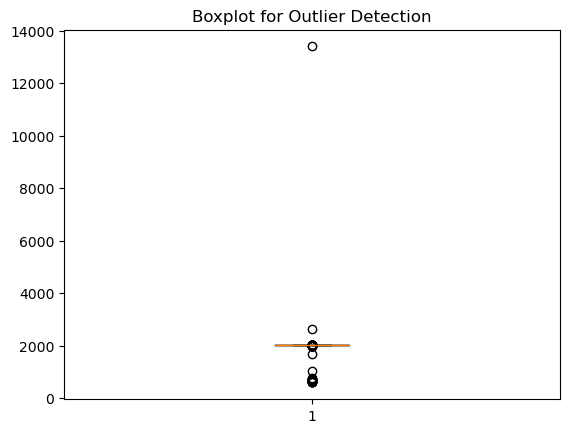

In [66]:
plt.boxplot(df['Production Year'])
plt.title("Boxplot for Outlier Detection")
plt.show()

### Create Age Column

In [54]:
def extract_age(bio):
    current_year = datetime.now().year

    # Detect direct age expressions (e.g., "۱۸ ساله" or "18 years old")
    match = re.search(r'\b(\d{2,3})\s*(?:سال|years?)\b', bio, re.IGNORECASE)
    if match:
        age = int(match.group(1))
        return age if 10 <= age <= 120 else None

    # Detect birth year expressions (e.g., "متولد ۱۳۷۵" or "born in 1992")
    match = re.search(r'(?:متولد|born in)\s*(\d{4})', bio, re.IGNORECASE)
    if match:
        birth_year = int(match.group(1))
        if birth_year > 1300:  # تبدیل سال شمسی به میلادی
            birth_year += 621
        return current_year - birth_year if 10 <= (current_year - birth_year) <= 120 else None

    # Detect full birth date (e.g., "۳ اردیبهشت ۱۳۷۴" or "May 5, 1992")
    match = re.search(r'(\d{1,2})\s*(\w+)\s*(\d{4})\s*(?:در\s*[\w\s]+)?', bio, re.IGNORECASE)
    if match:
        try:
            day = int(match.group(1))
            month = match.group(2)
            year = int(match.group(3))
            
            # Convert Solar Hijri year to Gregorian
            if year > 1300:  
                year += 621

            # Persian month names
            months_shamsi = {
                'فروردین': 1, 'اردیبهشت': 2, 'خرداد': 3, 'تیر': 4, 'مرداد': 5, 'شهریور': 6,
                'مهر': 7, 'آبان': 8, 'آذر': 9, 'دی': 10, 'بهمن': 11, 'اسفند': 12
            }
            
            # English month names
            months_english = {
                'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
            }

            # Determine whether the month is Persian or Gregorian
            month_number = months_shamsi.get(month, None)
            if not month_number:
                month_number = months_english.get(month, None)

            if month_number:
                birth_date = datetime(year, month_number, day)
                return current_year - birth_date.year if 10 <= (current_year - birth_date.year) <= 120 else None
        except ValueError:
            pass

    # Detect birth date in "۲۶/۱/۱۳۸۲" format
    match = re.search(r'(?:متولد)\s*(\d{1,2})/(\d{1,2})/(\d{4})', bio)
    if match:
        day = int(match.group(1))
        month = int(match.group(2))
        year = int(match.group(3))
         # Convert Solar Hijri year to Gregorian
        if year > 1300:  
            year += 621
        birth_date = datetime(year, month, day)
        return current_year - birth_date.year if 10 <= (current_year - birth_date.year) <= 120 else None

    # Detect age from phrases like "۲۵ ساله"
    match = re.search(r'(\d{1,3})\s*سال\s*ه', bio)
    if match:
        age = int(match.group(1))
        return age if 10 <= age <= 120 else None

    return None

In [55]:
df['Age'] = df['Biography'].apply(lambda x: extract_age(x) if isinstance(x, str) else None)

In [56]:
Q1 = df['Age'].quantile(0.25)  # First quartile (25%)
Q3 = df['Age'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

In [57]:
outliers

,Director Name,Director Surname,Country of Birth,Country of Residence,Phone Number,Email,Biography,Portrait Photo,Title,Film Category,...,Rejected,First Listed,Final Listed,Email Sent,Gender,Duration_cleaned,duration_english,duration_mm_ss,Inspired_By_Kiarostami_clean,Age
302,رضا,ارژنگ,ایران,Iran,009389354710162,reza.arzhang48@gmail.com,رضاارژنگ متولد 1348تهران. دانش آموخته دانشکده ...,media/portrait_photos/Screenshot_2024-03-25-22...,در door,Experimental,...,True,False,False,False,male,,یک دقیقه و شانزده ثانیه,00:00,No,56.0
307,رضا,ارژنگ,ایران,Iran,009389354710162,reza.arzhang48@gmail.com,متولد 1348تهران کارشناسی پویانمایی و ساخت ده ه...,media/portrait_photos/Screenshot_2024-03-19-20...,پشمک cotton candy,Documentary,...,True,False,False,False,male,,ده دقیقه و بیست و هشت ثانیه,00:00,No,56.0
358,محمدعلی,صفورا,ایران,Iran,989123008134,safoora_m@yahoo.com,•\tمحمدعلي صفورا ، متولد 1344، فیلمساز و مدرس ...,media/portrait_photos/safoora_400.jpg,منظرهای من در هفت سال,Experimental,...,True,False,False,False,male,21,21,21:00,No,60.0
360,محمدعلی,صفورا,ایران,Iran,989123008134,safoora_m@yahoo.com,محمدعلي صفورا ، متولد 1344، فیلمساز و مدرس دان...,media/portrait_photos/safoora_400_6ZWYwSa.jpg,هنوز یک دوچرخه کم است,Documentary,...,True,False,False,False,male,12.40,12.40,12:24,No,60.0
362,محمدعلی,صفورا,ایران,Iran,989123008134,safoora_m@yahoo.com,محمدعلي صفورا ، متولد 1344، فیلمساز و مدرس دان...,media/portrait_photos/safoora_400_HGwKSXz.jpg,پنجره های اطراف ما,Documentary,...,True,False,False,False,male,5.55,5.55,05:33,No,60.0
749,Mashaallah,Mohammadi,Iran,Iran,+989183711932,arezart2014@gmail.com,متولد ۱۳۴۸ سنندج .از ۱۱ سالگی نقاشی را شروع کر...,media/portrait_photos/000000000000000.jpg,آدمها,Animation,...,False,False,False,False,male,:,3:10,03:10,Other ways,56.0
757,مریم,امینی قاضی جهانی,ایران,Iran,98 09143199083,aminimaryam52@gmail.com,متولد 1347 تبریز\r\nکارشناس ارشد ادبیات نمایشی...,media/portrait_photos/ax_hyQro7a.jpg,زندگی با طعم بیسکوییت,Fiction,...,False,False,False,False,female,24,24,24:00,Yes,57.0


In [110]:
df.to_csv('./Final_dataset.csv')